# OpenStack_buglist Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import random
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#read data

In [3]:
filename = "C:\\Users\\zaina\\Documents\\DataVisulaization_MachineLearning\\Open_Stack\\buglist.xlsx"
'''n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 500 #desired sample size
skip = sorted(random.sample(xrange(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df=pd.read_excel(filename,skiprows=skip)'''
df=pd.read_excel(filename)

In [4]:
sLength = len(df['assignee'])  
assignee_name=pd.Series(str(re.findall('.*~(.*)',str(i))) if len(re.findall('.*~(.*)',str(i)))>0 else 'NA' for i in df.assignee)
df = df.assign(assignee_name=assignee_name.values)
df.head()

,req,bug,version,project,component,fault_class,fault_type,fault_description,fault_symptom,severity,priority,status,mitigation,log,repro,submitter,assignee,created,deployment,assignee_name
0,important servers should have backups,https://bugs.launchpad.net/openstack-ci/+bug/1...,NaN,openstack-ci,NaN,NaN,NaN,cloud image snapshots aren't as reliable as on...,NaN,Critical,NaN,In Progress,NaN,NaN,NaN,https://api.launchpad.net/devel/~corvus,NaN,2012-06-08 18:55:56.257384+00:00,NaN,NA
1,fix-char-dev-permissions,https://bugs.launchpad.net/anvil/+bug/1184013,NaN,anvil,NaN,NaN,NaN,Instead of doing the chmod recommendation for ...,NaN,Critical,NaN,Confirmed,NaN,NaN,NaN,https://api.launchpad.net/devel/~harlowja,NaN,2013-05-24 21:42:21.365222+00:00,NaN,NA
2,stream wrapper only works for default region,https://bugs.launchpad.net/openstack-sdk-php/+...,NaN,openstack-sdk-php,NaN,NaN,NaN,Stream wrappers should work for regions other ...,NaN,Critical,NaN,Confirmed,NaN,NaN,NaN,https://api.launchpad.net/devel/~mattfarina,https://api.launchpad.net/devel/~sam-choi,2014-04-03 21:12:46.056397+00:00,NaN,['sam-choi']
3,Keystone client fails to authorize during trus...,https://bugs.launchpad.net/blazar/+bug/1326066,NaN,blazar,NaN,NaN,NaN,The current Keystone client for the V3 API fai...,NaN,Critical,NaN,Fix Committed,NaN,NaN,NaN,https://api.launchpad.net/devel/~pablo-a-fuente,https://api.launchpad.net/devel/~pablo-a-fuente,2014-06-03 17:14:04.753627+00:00,NaN,['pablo-a-fuente']
4,TOSCA translator is missing tests,https://bugs.launchpad.net/heat-translator/+bu...,NaN,heat-translator,NaN,NaN,NaN,There are currently no test cases at all defin...,NaN,Critical,NaN,Fix Committed,NaN,NaN,NaN,https://api.launchpad.net/devel/~thomas-spatzier,https://api.launchpad.net/devel/~ton-i,2014-06-04 08:43:30.334908+00:00,NaN,['ton-i']


In [5]:
#Analyze bugs by status
import re
status=pd.value_counts(df['status'].values, sort=True)
statuscnt=len(status)
y_status=pd.np.array(map(int,status))
x_status=pd.np.array(map(str,status.index))

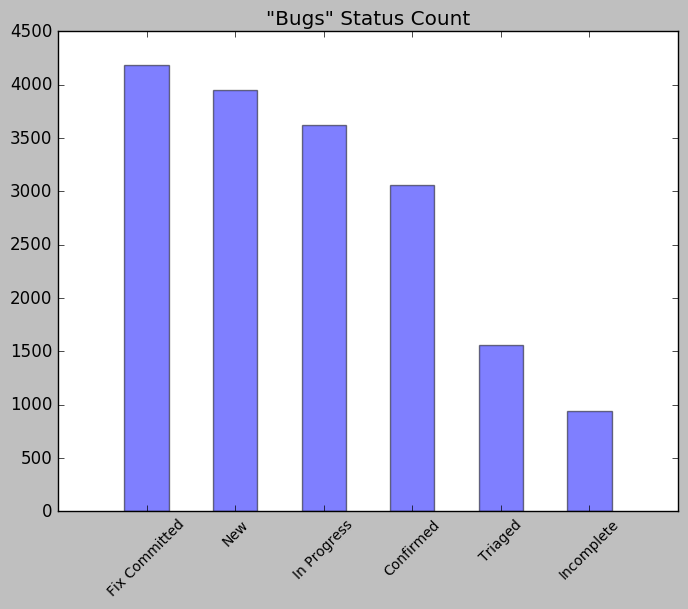

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
xaxis_status = np.arange(len(x_status)) 
plt.bar(xaxis_status,y_status, 0.5, align='center',alpha=0.5)
plt.xticks(xaxis_status, x_status, rotation=45, fontsize=10) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(y_pos)
#plt.setp(x_pos, rotation=45, fontsize=10)
plt.title('"Bugs" Status Count')
plt.show()

In [7]:
#Analyze bugs by Project
project=pd.value_counts(df['project'].values, sort=True)
y_project=pd.np.array(map(int,project))
y_project=y_project[0:10]
x_project=pd.np.array(map(str,project.index))
x_project=x_project[0:10]
#print y_project,x_project

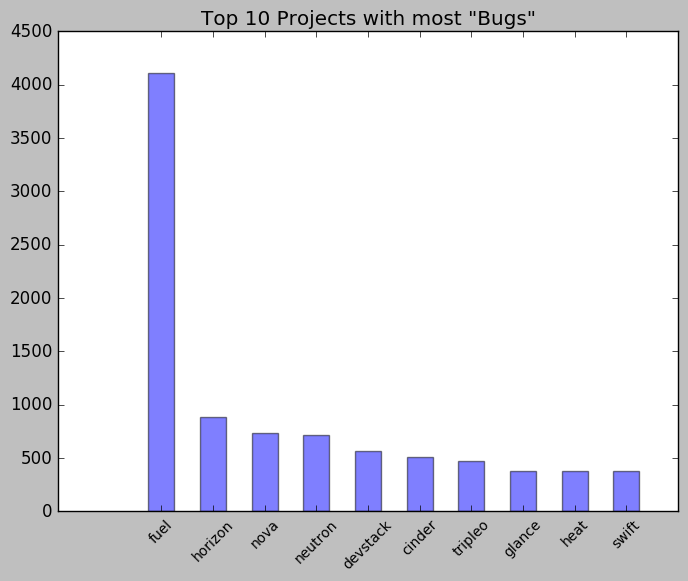

In [8]:
xaxis_project = np.arange(len(x_project)) 
plt.bar(xaxis_project,y_project, 0.5, align='center',alpha=0.5)
plt.xticks(xaxis_project, x_project, rotation=45, fontsize=10) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(y_pos)
#plt.setp(x_pos, rotation=45, fontsize=10)
plt.title('Top 10 Projects with most "Bugs"')
plt.show()

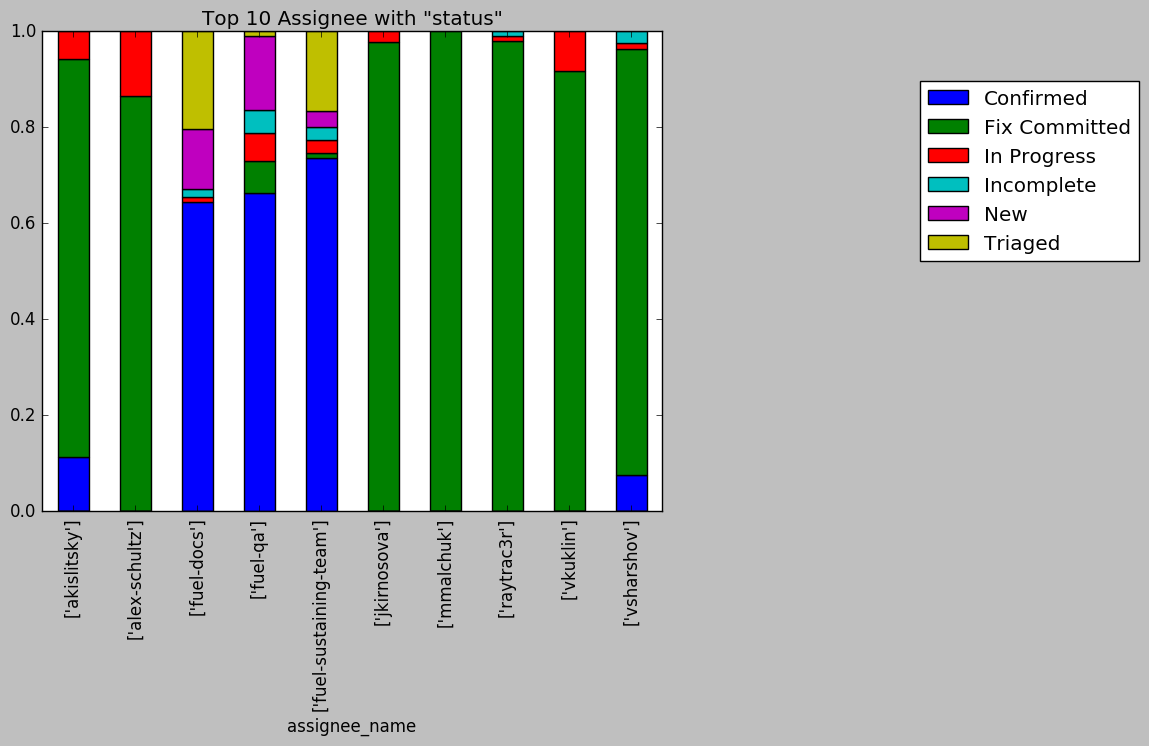

In [9]:
top_assignee_name= project=pd.value_counts(df['assignee_name'].values, sort=True)
top_assignee_name=pd.np.array(map(str,top_assignee_name.index))
top_assignee_name= [i for i in top_assignee_name if i!='NA']
top_assignee_name=top_assignee_name[0:10]
top_assignee_name= df[df['assignee_name'].isin(top_assignee_name)]
top_assignee_name = pd.crosstab(index=top_assignee_name['assignee_name'], columns=top_assignee_name['status'],margins=False)
df3=top_assignee_name.div(top_assignee_name.sum(axis=1), axis=0)
plt.show(df3.plot.bar(stacked=True, legend=False,title='Top 10 Assignee with "status"').legend(bbox_to_anchor=(1.4, 0.5),loc='lower left'))


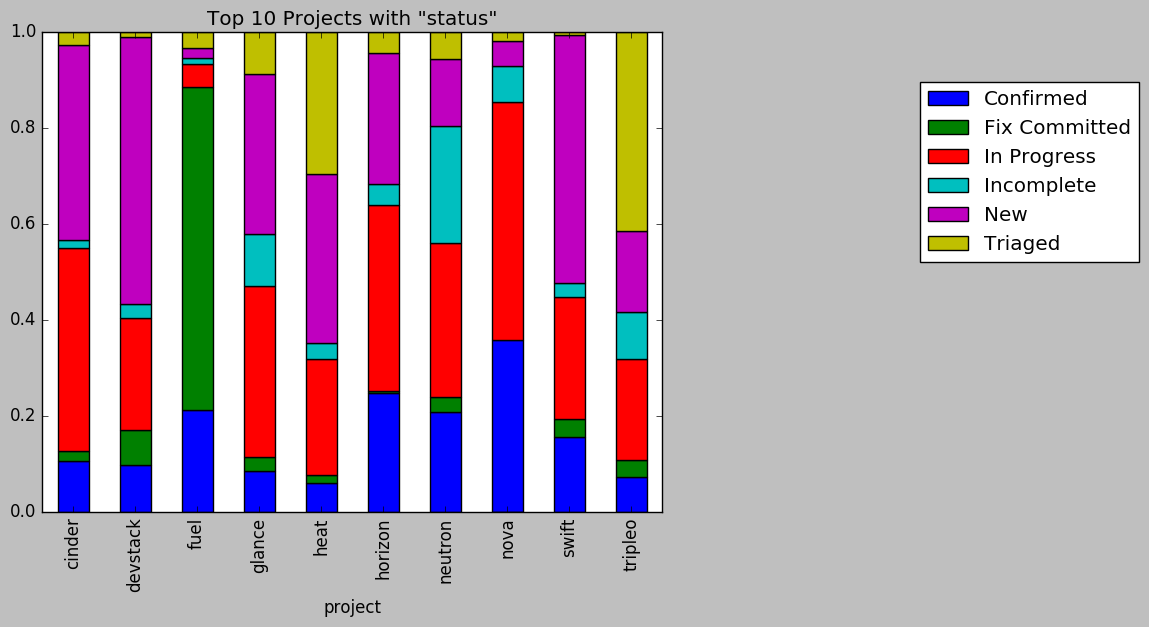

In [10]:
'''
Fix_Committed_cnt=pd.value_counts((df['status']  == 'Fix Committed'), sort=True) 
Fix_Committed_cnt=Fix_Committed_cnt[True]
In_Progress_cnt=pd.value_counts((df['status'] == 'In Progress').values, sort=True)
In_Progress_cnt=In_Progress_cnt[True]
Confirmed_cnt=pd.value_counts((df['status'] == 'Confirmed').values, sort=True)
Confirmed_cnt=Confirmed_cnt[True]
Triaged_cnt=pd.value_counts((df['status'] == 'Triaged').values, sort=True)
Triaged_cnt=Triaged_cnt[True]
New_cnt=pd.value_counts((df['status'] == 'New').values, sort=True)
New_cnt=New_cnt[True]
Incomplete_cnt=pd.value_counts((df['status'] == 'Incomplete').values, sort=True)
Incomplete_cnt=Incomplete_cnt[True]
totals = [i+j for i,j in zip((df['status']  == 'Fix Committed'), (df['status'] == 'In Progress'))]'''
top_project= project=pd.value_counts(df['project'].values, sort=True)
top_project=pd.np.array(map(str,top_project.index))
top_project= top_project[0:10]
top_project= df[df['project'].isin(top_project)]
top_project = pd.crosstab(index=top_project['project'], columns=top_project['status'],margins=False)
df3=top_project.div(top_project.sum(axis=1), axis=0)
#print df2.sum(axis=1),df3,top_project
plt.show(df3.plot(kind='bar',stacked =True,title='Top 10 Projects with "status"').legend(bbox_to_anchor=(1.4, 0.5),loc='lower left'))

In [11]:
#Time Elapsed between Request
#ML to categorized critical and high bugs


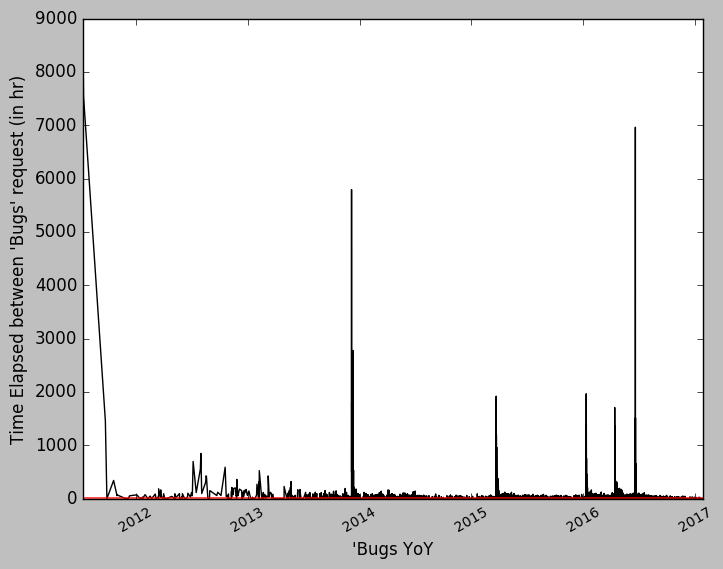

In [18]:
import datetime
from datetime import timedelta
import time
Time_frame=df.created.sort_values(ascending='True')

format = "%a %b %d %H:%M:%S %Y"
#print Time_frame.head()
#2014-04-03 21:12:46.056397+00:00
lst_time=[]
lst_created_date=[]
import re
for i in range(0,len(Time_frame)-1):
    time_elapsed=datetime.datetime.strptime(Time_frame[i+1],"%Y-%m-%d %H:%M:%S.%f+00:00")-datetime.datetime.strptime(Time_frame[i],"%Y-%m-%d %H:%M:%S.%f+00:00")
    if time_elapsed.days>0:
        myday= str(time_elapsed).strip()
        day=map(int,[re.findall('^([0-9]*)',myday) if len(re.findall('([0-9]*)\s',myday))>0 else ['0']][0])
        hour=map(int,[re.findall('.*,\s([0-9]*)',myday)if len(re.findall('.*,\s([0-9]*)',myday))>0 else ['0']][0])
        min=map(int,[re.findall('.*:([0-9]*):.*',myday) if len(re.findall('.*:([0-9]*):.*',myday))>0 else ['0']][0])
        mytime=day[0]*24+hour[0]+(min[0]/60)
    else:
        mytime=0
    lst_time.append(mytime)
lst_time.append(0)
df=df.assign(Time_Elapsed_in_hour=lst_time)
for i in df.created:
    created_date=datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S.%f+00:00")
    lst_created_date.append(created_date)
df=df.assign(created_date=lst_created_date) 


plt.plot(df.created_date.sort_values(ascending='True'),df.Time_Elapsed_in_hour,color='black')
y_mean = [np.average(df.Time_Elapsed_in_hour) for i in df.created_date]
plt.plot(df.created_date.sort_values(ascending='True'),y_mean,linestyle='-',color='red')
label=str(df.created_date.sort_values(ascending='True'))
plt.ylabel("Time Elapsed between 'Bugs' request (in hr)")
plt.xlabel("'Bugs YoY")
plt.title('')
plt.xticks(rotation="30", fontsize="10")
plt.show()

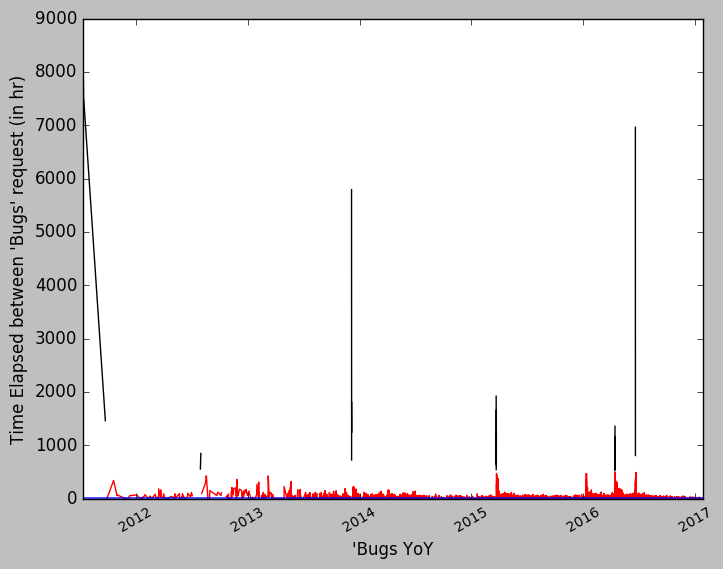

In [19]:
#Analyze Time_Elapsed 
Less_error=df.Time_Elapsed_in_hour.copy()
Frequent_error=df.Time_Elapsed_in_hour.copy()
Less_error[Less_error < 500]= np.nan
Frequent_error[Frequent_error >= 500] =np.nan

plt.plot(df.created_date.sort_values(ascending='True'),Less_error,color='black')
plt.plot(df.created_date.sort_values(ascending='True'),Frequent_error,color='red')

y_mean = [np.average(df.Time_Elapsed_in_hour) for i in df.created_date]
plt.plot(df.created_date.sort_values(ascending='True'),y_mean,linestyle='-',color='blue')
label=str(df.created_date.sort_values(ascending='True'))
plt.ylabel("Time Elapsed between 'Bugs' request (in hr)")
plt.xlabel("'Bugs YoY")
plt.title('')
plt.xticks(rotation="30", fontsize="10")
plt.show()

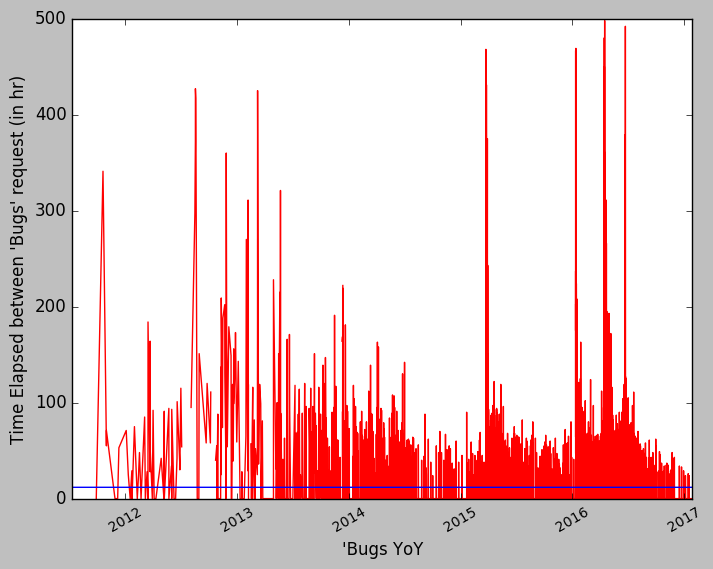

In [20]:
plt.plot(df.created_date.sort_values(ascending='True'),Frequent_error,color='red')

y_mean = [np.average(df.Time_Elapsed_in_hour) for i in df.created_date]
plt.plot(df.created_date.sort_values(ascending='True'),y_mean,linestyle='-',color='blue')
label=str(df.created_date.sort_values(ascending='True'))
plt.ylabel("Time Elapsed between 'Bugs' request (in hr)")
plt.xlabel("'Bugs YoY")
plt.title('')
plt.xticks(rotation="30", fontsize="10")
plt.show()

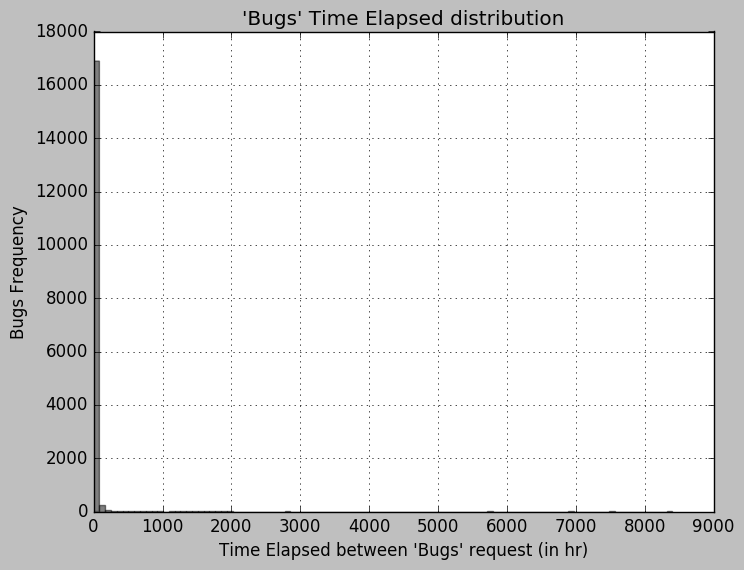

In [21]:
df['Time_Elapsed_in_hour'].hist(color='k', alpha=0.5, bins=100)
plt.xlabel("Time Elapsed between 'Bugs' request (in hr)")
plt.ylabel("Bugs Frequency")
plt.title("'Bugs' Time Elapsed distribution")
plt.show()


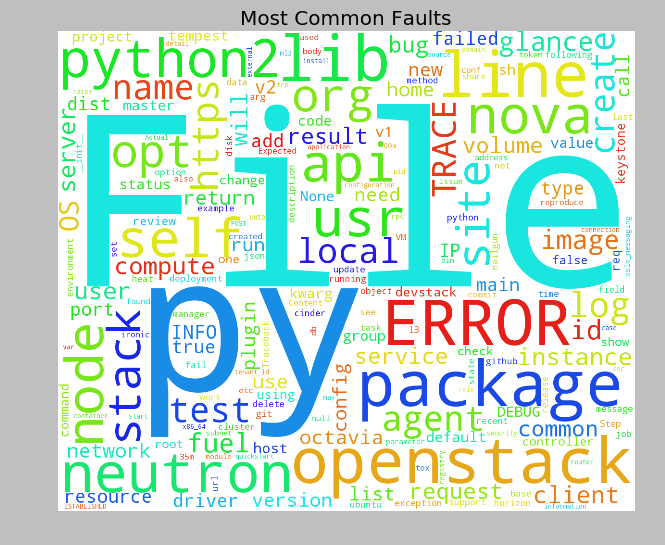

In [22]:
#Analyze fault_description randomly
df_word=random.sample(df.fault_description,500)
word_string=''
for i in df_word:
    word_string= word_string+i
wordcloud_fault = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(word_string)
plt.imshow(wordcloud_fault)
plt.axis('off')
plt.title('Most Common Faults')
plt.show()

In [17]:
print wordcloud_fault